# Pupil diameter
- Visualize pupil diameter throughout the experiment
- Preprocess noisy pupil diameter signal
- Apply subtractive baseline correction
- Perform analysis of pupil diameter (mean, sd, ttest)

In [2]:
# Required library
import pandas as pd

# Load the csv file containing eye tracker data into a pandas DataFrame
data = pd.read_csv("sample_eye_tracking_data.csv")

# Display the first 5 rows
data.head()

,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,...,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_validity,stim_present,stim_cat,stim_id,remarks,seconds
0,968093447,4216139004279,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)",0,"(nan, nan)",...,0,NaN,0,"(nan, nan, nan)",0,False,NaN,NaN,NaN,968.093447
1,968110947,4216139021787,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)",0,"(nan, nan)",...,0,NaN,0,"(nan, nan, nan)",0,False,NaN,NaN,NaN,968.110947
2,968111780,4216139022621,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)",0,"(nan, nan)",...,0,NaN,0,"(nan, nan, nan)",0,False,NaN,NaN,NaN,968.111780
3,968112613,4216139023454,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)",0,"(nan, nan)",...,0,NaN,0,"(nan, nan, nan)",0,False,NaN,NaN,NaN,968.112613
4,968113447,4216139024288,"(nan, nan)","(nan, nan, nan)",0,NaN,0,"(nan, nan, nan)",0,"(nan, nan)",...,0,NaN,0,"(nan, nan, nan)",0,False,NaN,NaN,NaN,968.113447


# Visualizing the pupil diameter signal
Use the function `overview_plot` from `utils.common` to visualize the pupil diameter signal.

In [3]:
# Import the function
from utils.common import overview_plot

# Print the function docstring for description and arguments
help(overview_plot)

Help on function overview_plot in module utils.common:

overview_plot(dataframe, pupil_to_plot=None)
    Plot the pupil diameter across the entire experiment session, with scrambled, stimulus, and fixation segments highlighted.
    
    Args:
        - dataframe (pd.DataFrame):    The dataframe containing eye-tracking data.
        - pupil_to_plot (str):  Which pupil diameter to plot. Allowed values: "left" or "right".
    
    Returns:
        - 1 (int): Will happen if you forget to pass in the `pupil_to_plot` argument.



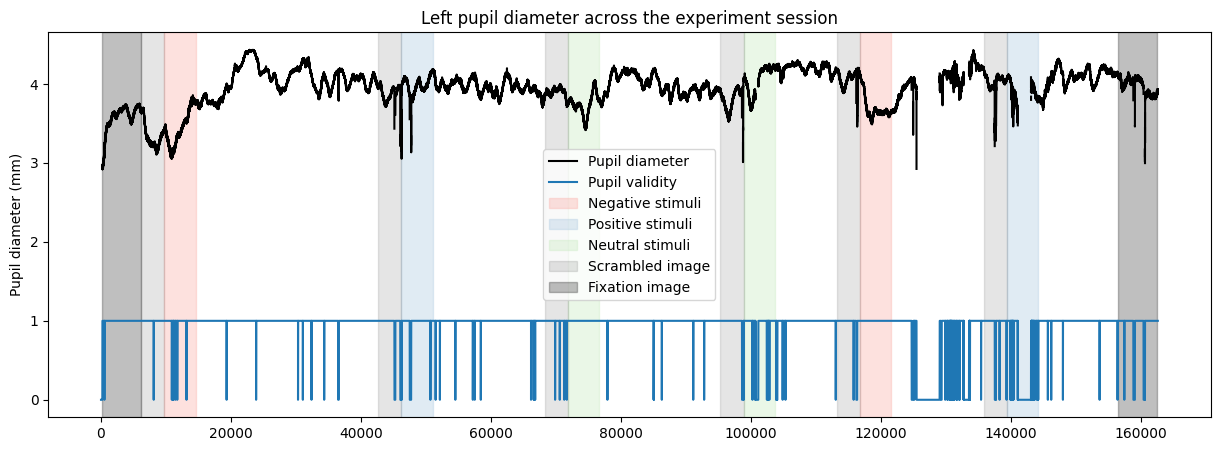

In [4]:
# Usage
overview_plot(data, pupil_to_plot='left')

# Preprocessing the pupil diameter signal

## Removal of invalid data (blinks)
Use the function `remove_invalids` from `utils.common` to drop all rows that do not contain pupil diameter data (likely due to blinks), and noisy data that surrounds a blink.

In [5]:
# Import the function and print docstring
from utils.common import remove_invalids
help(remove_invalids)

Help on function remove_invalids in module utils.common:

remove_invalids(dataframe, threshold=50, pad_before=150, pad_after=150, verbose=True)
    Removes continuous sequences of data where the pupil is invalid for atleast `threshold` number of samples;
    as well as the data before and after that sequence (size defined by `padding`).
    
    Args:
        - dataframe (pd.DataFrame):    The dataframe containing eye-tracking data.
        - threshold (int, optional):   Minimum number of continuous invalid rows to trigger removal. Defaults to 50.
        - pad_before (int, optional):  Number of rows to remove before each invalid segment. Defaults to 150.
        - pad_after (int, optional):   Number of rows to remove after each invalid segment. Defaults to 150.
        - verbose (bool, optional):    Print details on how much data has been removed. Defaults to True.
    
    Returns:
        - dataframe_clean (pd.DataFrame): Dataframe after removing invalid data + padding.



In [8]:
# Usage
data_invalids_removed = remove_invalids(data)

input dataframe size: 162646
ouput dataframe size: 144189
number of segments removed: 21
total number of rows removed: 18457


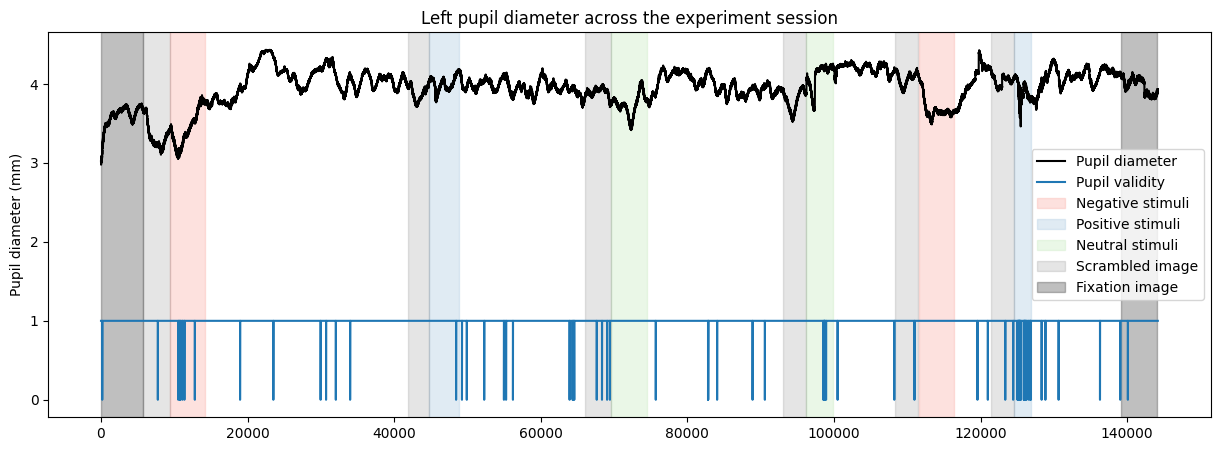

In [10]:
# Visualize to check
overview_plot(data_invalids_removed, pupil_to_plot='left')

## Replacing invalid data
Use the function `replace_invalids_w_nans` from `utils.common` to replace all rows that do not contain pupil diameter. Invalid data will be replaced with `np.nan`.

This function ensures that the length of the data stays the same, while ensuring the removal of noisy data.

While not used for pupil diameter, this function is a crucial component of saccade extraction. 

In [11]:
# Import the function and print docstring
from utils.common import replace_invalids_w_nans
help(replace_invalids_w_nans)

Help on function replace_invalids_w_nans in module utils.common:

replace_invalids_w_nans(dataframe, threshold=50, pad_before=150, pad_after=150, verbose=True)
    Replaces continuous sequences of data where the pupil is invalid for at least `threshold` samples
    with NaN values, including the data before and after that sequence (size defined by padding).
    
    Args:
        - dataframe (pd.DataFrame):    The dataframe containing eye-tracking data.
        - threshold (int, optional):   Minimum number of continuous invalid rows to trigger NaN replacement. Defaults to 50.
        - pad_before (int, optional):  Number of rows to replace with NaN before each invalid segment. Defaults to 150.
        - pad_after (int, optional):   Number of rows to replace with NaN after each invalid segment. Defaults to 150.
        - verbose (bool, optional):    Print details on how much data has been repalced. Defaults to True.
    
    Returns:
        - dataframe (pd.DataFrame): Dataframe with in

In [12]:
# Usage
data_invalids_replaced = replace_invalids_w_nans(data)

dataframe size: 162646
number of segments replaced with np.nan: 21
total number of rows replaced with np.nan: 18457


d:\GITHUB\eye-tracking-ccs\preprocessing & analysis\utils\common.py:213: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dataframe.iloc[replace_positions_sorted] = np.nan


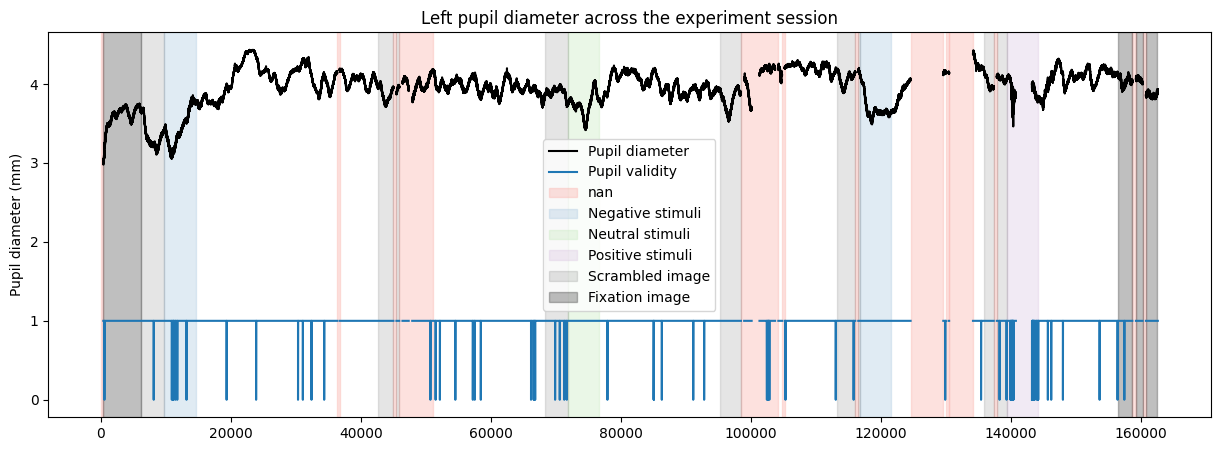

In [13]:
# Visualize to check
overview_plot(data_invalids_replaced, pupil_to_plot='left')

## Applying smoothing to the pupil diameter signal
Use the function `apply_smoothing` from `utils.pupildiameter` to smooth the pupil diameter signal.

In [14]:
# Import the function and print docstring
from utils.pupildiameter import apply_smoothing
help(apply_smoothing)

Help on function apply_smoothing in module utils.pupildiameter:

apply_smoothing(dataframe, window_length=101, polyorder=3, plot_fig=False)
    Applies smoothing to the pupil diameter to decrease random fluctuations.
    
    Args:
        - dataframe (pd.DataFrame): The dataframe containing eye-tracking data,
                             ideally after invalid rows have been removed by the `remove_invalids` function.
        - window_length (int, optional): The size of moving window over which the polynomial is fitted. Argument is passed to Savitzky-Golay filter. Defaults to 101.
        - polyorder (int, optional):     The degree of polynomial used to approximate the data inside each window. Argument is passed to Savitzky-Golay filter. Defaults to 3.
        - plot_fig (bool, optional):     If True, plot figure which overlays the raw and smoothed signals. Defaults to False.
    
    Returns:
        - dataframe (pd.DataFrame): Dataframe after applying smoothing to pupil diameter.
    

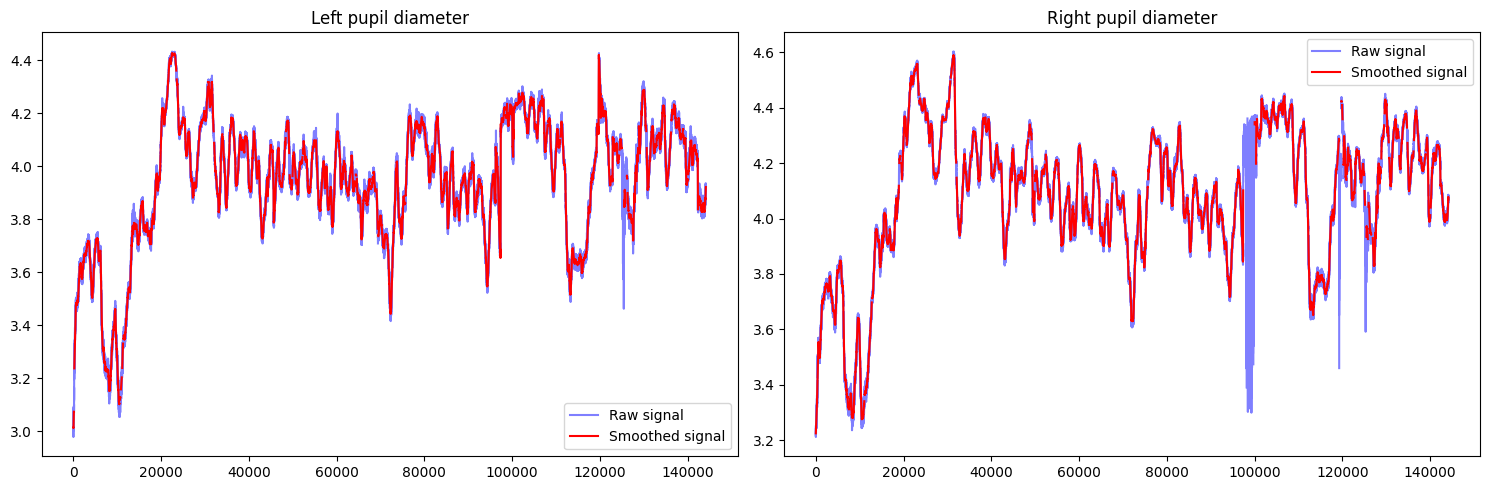

In [15]:
# Usage
# Note: Use the dataframe from which invalid and noisy data has been removed
data_invalids_removed_smoothed = apply_smoothing(data_invalids_removed, plot_fig=True)

# Performing baseline correction of pupil diameter
. . . 